# Análises Exploratórias em um arquivo sobre jogos, disponivel no site Kaggle

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
dados = pd.read_csv('C:/Users/vitor/Desktop/Estudos/vgsales.csv')
dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Vendas_Globais','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(5)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [355]:
len(dados)

16598

In [276]:
dados.Genero.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genero, dtype: int64

In [277]:
genero_vendas = dados.groupby('Genero')['Vendas_Globais'].sum()

In [278]:
genero_vendas

Genero
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Vendas_Globais, dtype: float64

In [279]:
q1 = dados[(dados.Genero == 'Action')]
round(sum(q1.Vendas_Globais))

1751

In [280]:
dados2 = pd.DataFrame(genero_vendas)
dados2.reset_index(inplace = True)
dados2.columns
dados2 = dados2.sort_values(by = 'Vendas_Globais')

<BarContainer object of 12 artists>

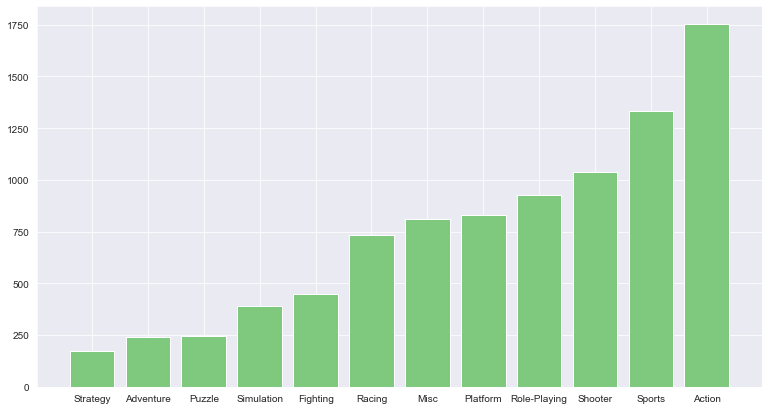

In [281]:
plt.figure(figsize = (13,7))
plt.bar(dados2.Genero,dados2.Vendas_Globais)

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos por gênero')

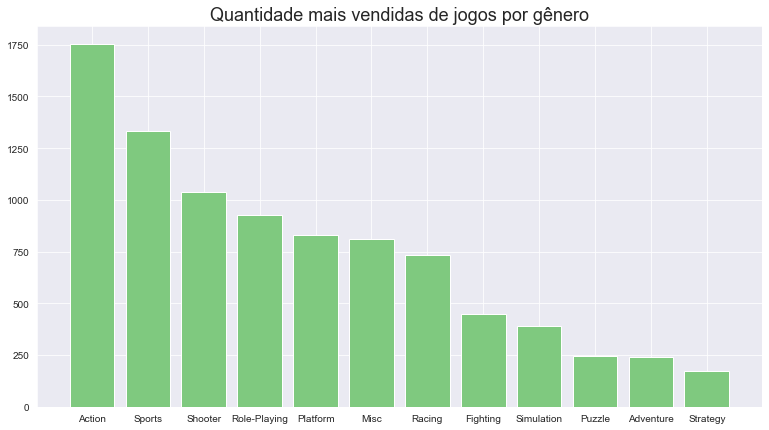

In [282]:
dados2 = dados2.sort_values(by = 'Vendas_Globais',ascending = False)
plt.figure(figsize = (13,7))
plt.bar(dados2.Genero, dados2.Vendas_Globais)
plt.title('Quantidade mais vendidas de jogos por gênero', fontsize = 18)

Text(0.5, 1.0, 'Quantidade mais vendidas de jogos por gênero')

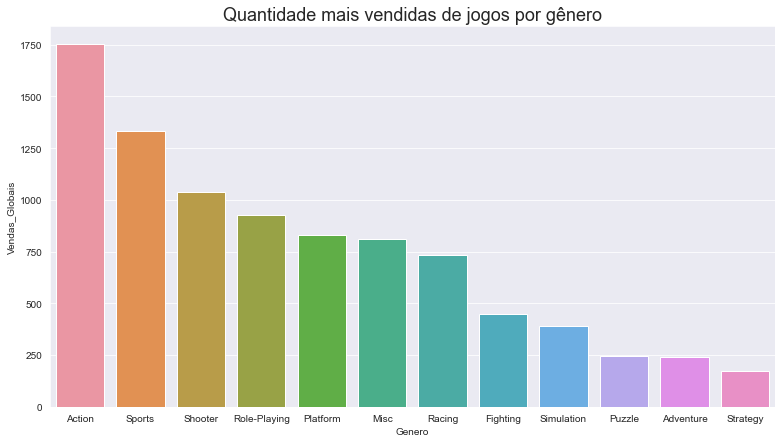

In [283]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(dados2.Genero, dados2.Vendas_Globais)
ax.figure.set_size_inches(13,7)
ax.set_title('Quantidade mais vendidas de jogos por gênero', fontsize = 18)

In [361]:
dados_por_genero = dados.groupby('Genero')
table = pd.DataFrame({'Soma das Vendas': dados_por_genero.Vendas_Globais.sum(), ' Qtd de Desenvolvedoras': dados_por_genero.Desenvolvedora.count(), 'Qtd de Plataformas': dados_por_genero.Plataforma.count()}).sort_values(by = 'Soma das Vendas', ascending = False).reset_index()
table

,Genero,Soma das Vendas,Qtd de Desenvolvedoras,Qtd de Plataformas
0,Action,1751.18,3309,3316
1,Sports,1330.93,2343,2346
2,Shooter,1037.37,1308,1310
3,Role-Playing,927.37,1486,1488
4,Platform,831.37,884,886
5,Misc,809.96,1712,1739
6,Racing,732.04,1248,1249
7,Fighting,448.91,846,848
8,Simulation,392.20,863,867
9,Puzzle,244.95,581,582


In [285]:
table2 = pd.DataFrame(dados.Desenvolvedora.value_counts().head(16)).reset_index()
table2.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Quantidade'},inplace = True)
table2

,Desenvolvedora,Quantidade
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [337]:
query1 = dados[(dados.Desenvolvedora == 'Electronic Arts')]
query1

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Vendas_Globais
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [339]:
query1.Genero.value_counts()

Sports          561
Action          183
Racing          159
Shooter         139
Simulation      116
Misc             46
Fighting         39
Strategy         37
Role-Playing     35
Platform         16
Adventure        13
Puzzle            7
Name: Genero, dtype: int64

In [ ]:
query1.Genero.value_counts()

In [287]:
query1.groupby('Genero')['Vendas_Globais'].mean().round(2).sort_values(ascending = False)

Genero
Shooter         1.14
Role-Playing    1.01
Racing          0.92
Sports          0.86
Fighting        0.80
Simulation      0.77
Puzzle          0.65
Action          0.63
Misc            0.54
Platform        0.41
Strategy        0.38
Adventure       0.37
Name: Vendas_Globais, dtype: float64

In [317]:
dados2 = pd.DataFrame(genero_vendas)

In [333]:
a = pd.DataFrame(dados.Genero.value_counts())
a.sort_values(by = 'Genero', ascending = False, inplace = True)
a.reset_index(inplace = True)
a.rename(columns = {'index':'Genero','Genero':'qtd'}, inplace = True)
a

,Genero,qtd
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


In [334]:
b = pd.DataFrame(dados.Desenvolvedora.value_counts())
b.sort_values(by = 'Desenvolvedora', ascending = False, inplace = True)
b.reset_index(inplace = True)
b.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'qtd'}, inplace = True)
b.head(12)

,Desenvolvedora,qtd
0,Electronic Arts,1351
1,Activision,975
2,Namco Bandai Games,932
3,Ubisoft,921
4,Konami Digital Entertainment,832
5,THQ,715
6,Nintendo,703
7,Sony Computer Entertainment,683
8,Sega,639
9,Take-Two Interactive,413


In [359]:
len(dados.Desenvolvedora.value_counts())

578

In [396]:
c = dados[(dados.Genero == 'Action')]
c.Desenvolvedora.value_counts()

Activision                 310
Namco Bandai Games         248
THQ                        194
Ubisoft                    193
Electronic Arts            183
                          ... 
Prototype                    1
Flashpoint Games             1
IE Institute                 1
Gremlin Interactive Ltd      1
CyberFront                   1
Name: Desenvolvedora, Length: 228, dtype: int64

In [397]:
d = dados[(dados.Genero == 'Sports')]
listad = dict(d.Desenvolvedora.value_counts())

In [416]:
values_view = listad.keys()
value_iterator = iter(values_view)
first_value = next(value_iterator)
print(first_value)

Electronic Arts
